<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/FashionMNIST/NeuronsNetwork_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()

train_size = int(0.8 * num_train_examples)
val_size = int(0.2 * num_train_examples)

val_dataset = train_dataset.skip(train_size)
val_dataset = val_dataset.cache()
train_dataset = train_dataset.take(train_size)

test_dataset  =  test_dataset.cache()

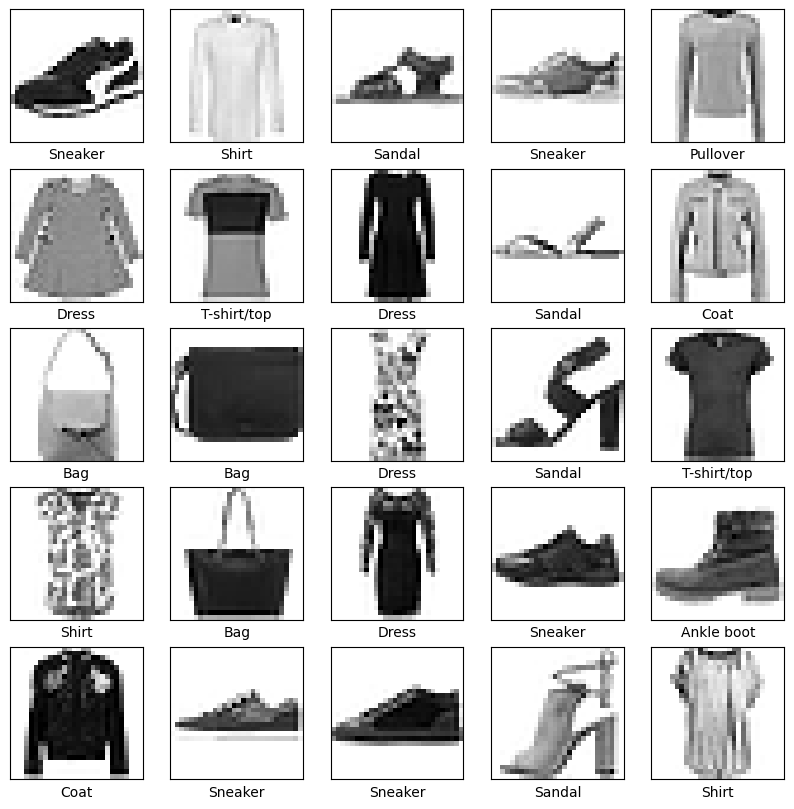

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in val_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128,  activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


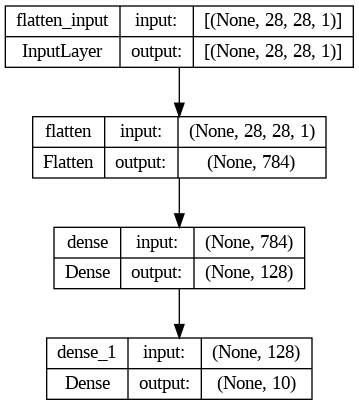

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='ANN.png', show_shapes=True, show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.2 MB/s eta 0:00:00


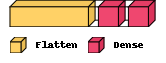

In [10]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

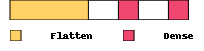

In [11]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

In [12]:
BATCH_SIZE = 32

train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
val_dataset = val_dataset.cache().batch(BATCH_SIZE)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128,  activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epoch = 200

import time
# get the start time
st = time.time()

from tensorflow import keras
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(train_dataset, epochs=epoch,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset) // BATCH_SIZE,
                     callbacks=[early_stopping],)


print('Execution time:', time.time() - st, 'seconds')

Epoch 1/200
1875/1875 [==============================] - 27s 11ms/step - loss: 1.2582 - accuracy: 0.6634 - val_loss: 0.8461 - val_accuracy: 0.7670
Epoch 2/200
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7627 - accuracy: 0.7567 - val_loss: 0.6632 - val_accuracy: 0.7869
Epoch 3/200
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6535 - accuracy: 0.7793 - val_loss: 0.5918 - val_accuracy: 0.8210
Epoch 4/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5956 - accuracy: 0.7977 - val_loss: 0.5476 - val_accuracy: 0.8210
Epoch 5/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5631 - accuracy: 0.8056 - val_loss: 0.5126 - val_accuracy: 0.8239
Epoch 6/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5389 - accuracy: 0.8133 - val_loss: 0.5002 - val_accuracy: 0.8295
Epoch 7/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5165 - accuracy: 0.8204 - val_loss: 0.4816 - va

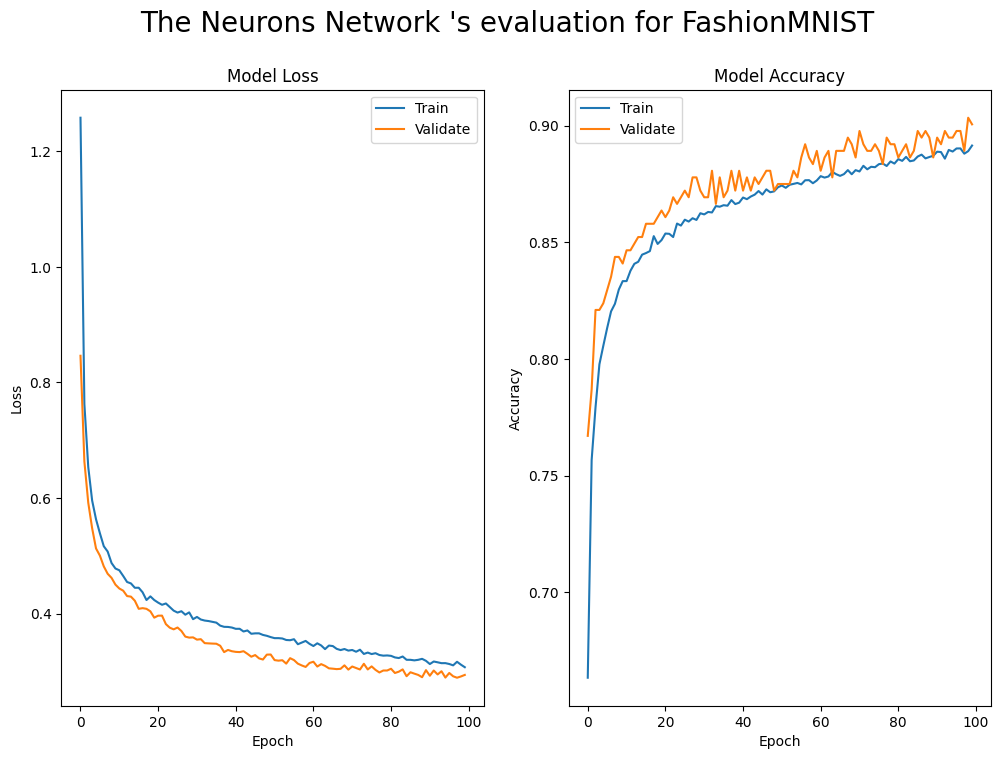

{'loss': [1.2581512928009033, 0.7626795768737793, 0.6534680724143982, 0.5956090092658997, 0.5631428956985474, 0.5389135479927063, 0.5164607763290405, 0.5072498917579651, 0.48739510774612427, 0.47789257764816284, 0.4748189449310303, 0.46501481533050537, 0.45455726981163025, 0.4520537555217743, 0.44454169273376465, 0.44460129737854004, 0.4367094337940216, 0.4233037829399109, 0.42966219782829285, 0.4233130216598511, 0.41885361075401306, 0.4150843322277069, 0.4173799753189087, 0.4112206995487213, 0.4049730896949768, 0.40163204073905945, 0.4039340317249298, 0.3979388475418091, 0.4019352197647095, 0.3902050256729126, 0.394066721200943, 0.3896033465862274, 0.3878006935119629, 0.38693276047706604, 0.38556531071662903, 0.3841896951198578, 0.3789937496185303, 0.37695157527923584, 0.3767562508583069, 0.37570875883102417, 0.37348905205726624, 0.3735489547252655, 0.3688649833202362, 0.3706704080104828, 0.36493661999702454, 0.36565274000167847, 0.36566847562789917, 0.3629421293735504, 0.361396223306

In [19]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("The Neurons Network 's evaluation for FashionMNIST ",fontsize=20)
axes[0].plot(history.history['loss'][:100])
axes[0].plot(history.history['val_loss'][:100])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'][:100])
axes[1].plot(history.history['val_accuracy'][:100])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()

print(history.history)

In [15]:
import tqdm
testX = []
testY = []
for (image, label) in tqdm.tqdm(test_dataset.take(10000)):
    image = tf.convert_to_tensor(image)
    testX.append(image)
    testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

testX.shape, testY.shape

100%|██████████| 10000/10000 [00:05<00:00, 1942.83it/s]


((10000, 28, 28, 1), (10000,))

<ipython-input-16-2adaef56cbf2>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)


<Figure size 1000x300 with 0 Axes>

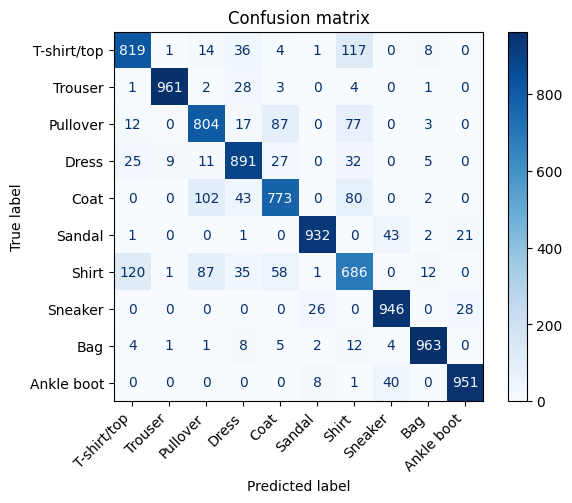

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

disp = ConfusionMatrixDisplay.from_predictions(
    testY, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(testY, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, y_pred))
from sklearn.metrics import f1_score
print(f1_score(testY, y_pred, average='weighted'))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.80      0.80      1000
       Dress       0.84      0.89      0.87      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.96      0.93      0.95      1000
       Shirt       0.68      0.69      0.68      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

0.8726
0.8727381995286206


In [18]:
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8726
Accuracy on test dataset: 0.8726000189781189


# Tăng số lượng lớp ẩn

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)               

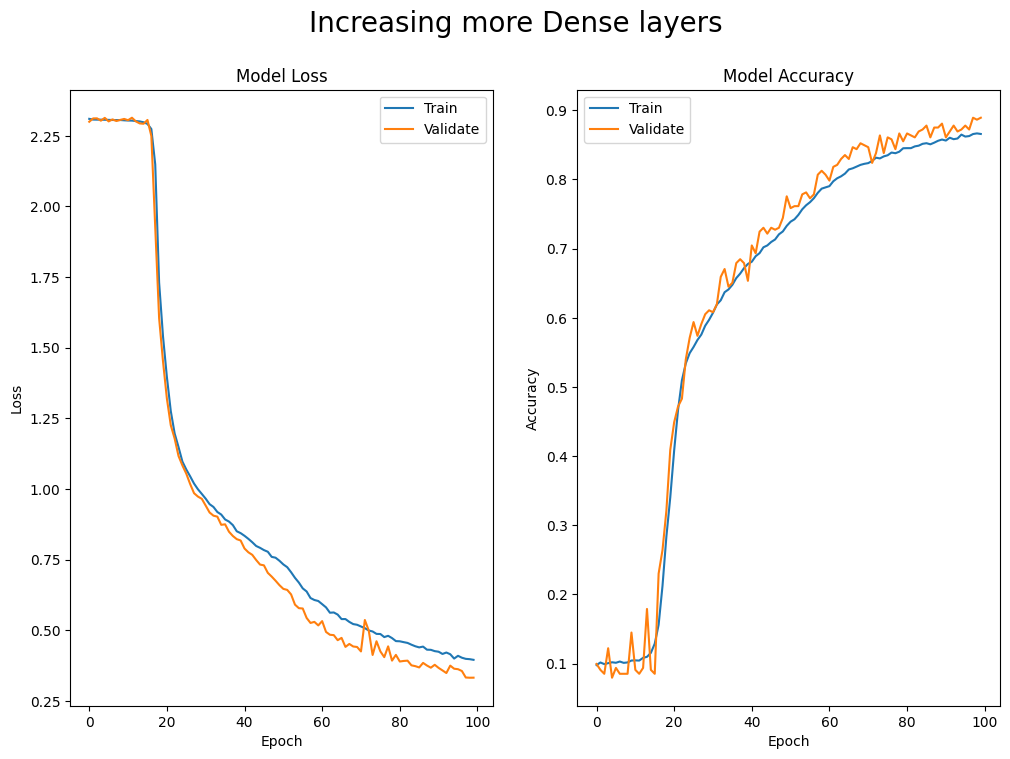

{'loss': [2.3100359439849854, 2.307450532913208, 2.3071696758270264, 2.3071439266204834, 2.306675672531128, 2.306382894515991, 2.3059639930725098, 2.3056390285491943, 2.30582857131958, 2.3048408031463623, 2.3040964603424072, 2.303797960281372, 2.302252769470215, 2.3009212017059326, 2.2979776859283447, 2.2920784950256348, 2.2740280628204346, 2.1488661766052246, 1.7303814888000488, 1.540544033050537, 1.3963702917099, 1.2760154008865356, 1.1963413953781128, 1.1481224298477173, 1.0967758893966675, 1.0687283277511597, 1.0445213317871094, 1.0189144611358643, 0.9987731575965881, 0.9822815656661987, 0.9654091596603394, 0.9460797905921936, 0.9361944198608398, 0.9183305501937866, 0.9093209505081177, 0.8918824195861816, 0.884422779083252, 0.8718698620796204, 0.8501143455505371, 0.8434761166572571, 0.8340368866920471, 0.8232119083404541, 0.8112608194351196, 0.7980221509933472, 0.791456937789917, 0.7834994196891785, 0.7776045799255371, 0.7595124244689941, 0.7564902901649475, 0.7456821799278259, 0.7

<ipython-input-21-eb0f165dab23>:56: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)


<Figure size 1000x300 with 0 Axes>

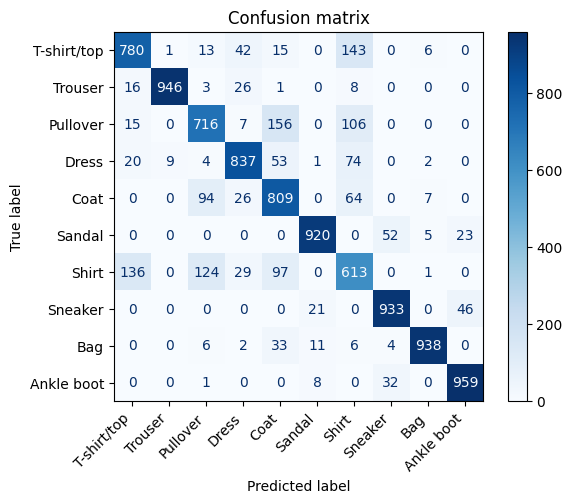

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.78      0.79      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.75      0.72      0.73      1000
       Dress       0.86      0.84      0.85      1000
        Coat       0.70      0.81      0.75      1000
      Sandal       0.96      0.92      0.94      1000
       Shirt       0.60      0.61      0.61      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.98      0.94      0.96      1000
  Ankle boot       0.93      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

0.8451
0.8462204697453058
313/313 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.8451
Accuracy on test dataset: 0.8450999855995178


In [21]:
# More Layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Display the model summary
model.summary()


model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


import time
# get the start time
st = time.time()
history = model.fit(train_dataset, epochs=100,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset) // BATCH_SIZE)
print('Execution time:', time.time() - st, 'seconds')


import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("Increasing more Dense layers ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()
print(history.history)

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

disp = ConfusionMatrixDisplay.from_predictions(
    testY, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()


from sklearn.metrics import classification_report
print(classification_report(testY, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, y_pred))
from sklearn.metrics import f1_score
print(f1_score(testY, y_pred, average='weighted'))

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)